In [1]:
!pip install -q -U diffusers["torch"] transformers
!pip install -q -U accelerate
!pip install -q -U git+https://github.com/huggingface/diffusers

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Time taken by Normal Stable Diffusion: 13.870912313461304


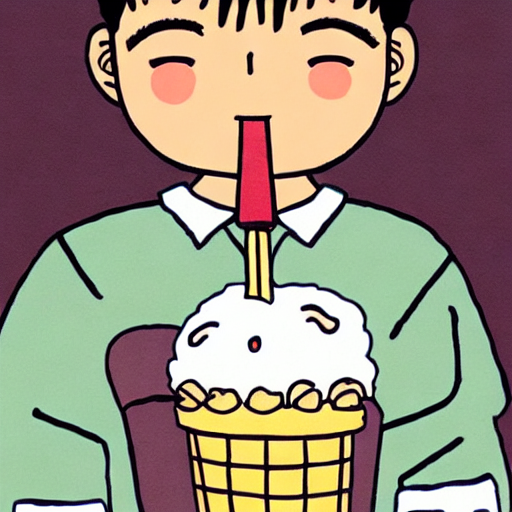

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import time

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "shin-chan eating icecream"

start = time.time()
image = pipe(prompt).images[0]
end = time.time()

sd_time = end-start
print(f"Time taken by Normal Stable Diffusion: {sd_time}")

image

### Comparison 

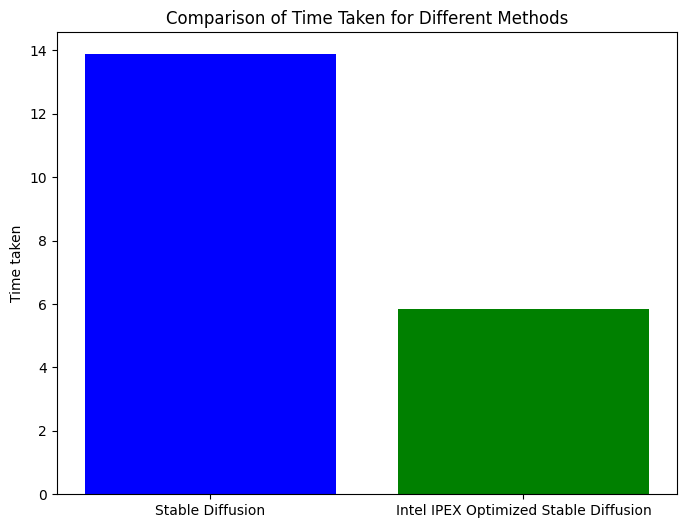

In [6]:
import matplotlib.pyplot as plt

# Data
methods = ['Stable Diffusion', 'Intel IPEX Optimized Stable Diffusion']
times = [13.870912313461304, 5.838752031326294] # time stamps taken from the other notebook and from above

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=['blue', 'green'])
plt.ylabel('Time taken')
plt.title('Comparison of Time Taken for Different Methods')
plt.show()